# Data Analysis

## Table of contents

1. [Nodes](#3.-Nodes)
2. [Edges](#4.-Edges)


# 1-Nodes

In [1]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import random
import pandas as pd
import plotly.express as px
import seaborn as sns


In [3]:
nodes = pd.read_csv("nodes.csv")
print("Nodes")
print("Data Preview:")
display(nodes.head())  
print("\nData Information:")
display(nodes.info())




Nodes
Data Preview:


,node_index,node_id,node_type,node_name,node_source
0,0,9796,gene/protein,PHYHIP,NCBI
1,1,7918,gene/protein,GPANK1,NCBI
2,2,8233,gene/protein,ZRSR2,NCBI
3,3,4899,gene/protein,NRF1,NCBI
4,4,5297,gene/protein,PI4KA,NCBI



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129375 entries, 0 to 129374
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   node_index   129375 non-null  int64 
 1   node_id      129375 non-null  object
 2   node_type    129375 non-null  object
 3   node_name    129375 non-null  object
 4   node_source  129375 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.9+ MB


None

In [4]:
data = nodes.drop_duplicates()

In [5]:
top_node_names = nodes.groupby('node_type')['node_name'].value_counts().groupby(level=0).head(10)
print("Top 10 Node Names by Type:")
print(top_node_names)


Top 10 Node Names by Type:
node_type  node_name                                                                            
anatomy    1st arch mandibular component                                                            1
           1st arch mandibular ectoderm                                                             1
           insect adult cerebral ganglion                                                           1
           insect adult nervous system                                                              1
           insect adult muscle system                                                               1
                                                                                                   ..
pathway    Defective SLC6A18 may confer susceptibility to iminoglycinuria and/or hyperglycinuria    2
           Defective SLC6A19 causes Hartnup disorder (HND)                                          2
           Maturation of protein M                          

In [6]:

unique_node_types = nodes['node_type'].nunique()
unique_sources = nodes['node_source'].nunique()


unique_node_ids = nodes['node_id'].unique()
unique_node_names = nodes['node_name'].unique()


missing_values = nodes.isnull().sum()

print(f"Unique Node Types: {unique_node_types}")
print(f"Unique Sources: {unique_sources}")
print(f"Unique Node IDs: {len(unique_node_ids)}")
print(f"Unique Node Names: {len(unique_node_names)}")
print(f"Missing Values: \n{missing_values}")


Unique Node Types: 10
Unique Sources: 9
Unique Node IDs: 90067
Unique Node Names: 129262
Missing Values: 
node_index     0
node_id        0
node_type      0
node_name      0
node_source    0
dtype: int64


In [9]:

node_type_counts = nodes['node_type'].value_counts().reset_index()
node_type_counts.columns = ['Node Type', 'Count']


fig = px.bar(node_type_counts, 
             x='Node Type', 
             y='Count', 
             title='Distribution of Node Types', 
             labels={'Node Type': 'Node Type', 'Count': 'Count'},
             color='Node Type',
             template='plotly_dark')  


fig.show()


In [10]:

source_counts = nodes['node_source'].value_counts().reset_index()
source_counts.columns = ['Source', 'Count']


fig = px.pie(source_counts, 
             names='Source', 
             values='Count', 
             title='Node Source Distribution',
             color='Source',
             template='plotly_dark')


fig.show()


Top 10 important links (highest integration score):
Link (0, 5) with integration score: 1
Link (0, 18) with integration score: 1
Link (0, 26) with integration score: 1
Link (0, 31) with integration score: 1
Link (0, 50) with integration score: 1
Link (0, 98) with integration score: 1
Link (1, 15) with integration score: 1
Link (1, 17) with integration score: 1
Link (1, 41) with integration score: 1
Link (1, 43) with integration score: 1


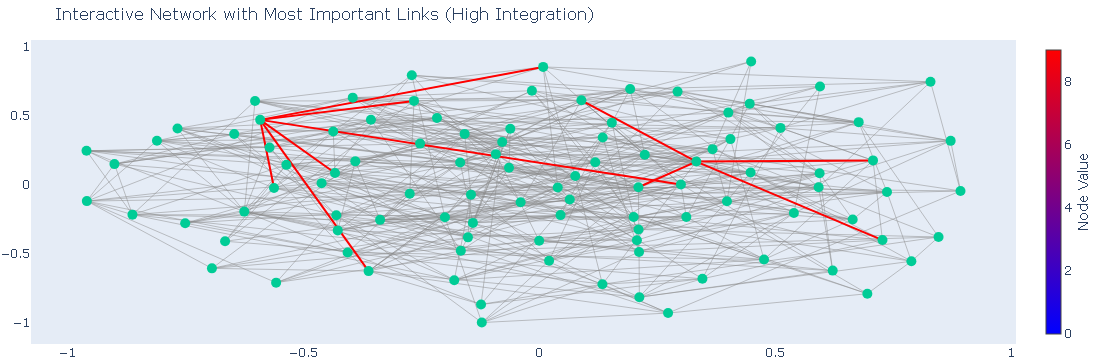

In [22]:
import networkx as nx


G = nx.erdos_renyi_graph(100, 0.1)  


def link_importance(G):
    link_importance_scores = {}
    
     
    for edge in G.edges():
        G_copy = G.copy()
        G_copy.remove_edge(*edge)
        
         
        components = list(nx.connected_components(G_copy))
        link_importance_scores[edge] = len(components)   
    
    return link_importance_scores

 
importance_scores = link_importance(G)

 
sorted_importance = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)
top_10_important_links = sorted_importance[:10]

 
print("Top 10 important links (highest integration score):")
for link, score in top_10_important_links:
    print(f"Link {link} with integration score: {score}")

 
pos = nx.spring_layout(G, seed=42)


node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

 
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

 
important_edge_x = []
important_edge_y = []
for edge, score in top_10_important_links:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    important_edge_x.extend([x0, x1, None])
    important_edge_y.extend([y0, y1, None])

 
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

important_edge_trace = go.Scatter(
    x=important_edge_x, y=important_edge_y,
    line=dict(width=2, color='red'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Bluered',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Value',
            xanchor='left',
            titleside='right'
        )
    )
)


node_text = []
for node in G.nodes():
    node_text.append(f"Node {node}")
node_trace.text = node_text

 
fig = go.Figure(data=[edge_trace, important_edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Network with Most Important Links (High Integration)',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
                )

fig.show()


In [34]:
# Sample edges for faster analysis (500 random edges)
sampled_edges = edges.sample(n=500, random_state=42)

# Create graph from sampled data
G = nx.from_pandas_edgelist(sampled_edges, source='x_index', target='y_index', edge_attr=['relation', 'display_relation'])

# Calculate centrality
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)



Top 50 Important Nodes (Articulation Points): [64427, 17396, 64487, 17883, 21367, 64317, 64314, 64863, 63430, 63584, 63370, 63713, 64545, 64476, 64352, 14308, 14310, 14958, 64553, 63240, 63377, 63465, 63501, 66050, 21348, 15319, 14517, 16695, 63745, 6144, 64311, 15192, 40405, 14164, 65138, 64798, 129374, 64800, 69442, 64339, 63603, 64334, 17149, 65557, 15457, 17653, 64485, 35432, 20783, 64391]


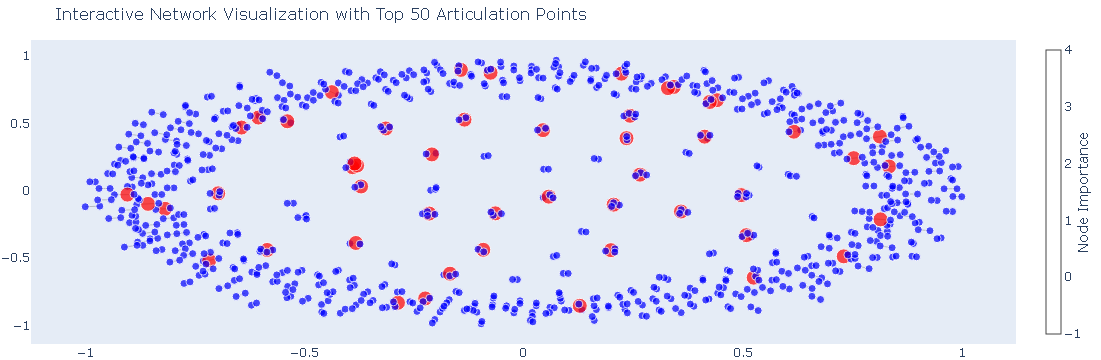

In [36]:
import plotly.graph_objects as go
import networkx as nx

 
important_nodes = list(nx.articulation_points(G))

 
top_important_nodes = important_nodes[:50]
print(f"Top 50 Important Nodes (Articulation Points): {top_important_nodes}")


pos = nx.spring_layout(G, seed=42)

 
non_important_nodes = [node for node in G.nodes if node not in top_important_nodes]

 
node_x = []
node_y = []
node_color = []
node_size = []

for node in G.nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    if node in top_important_nodes:
        node_color.append('red')
        node_size.append(15)
    else:
        node_color.append('blue')
        node_size.append(8)

 
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

 
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Bluered',
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Node Importance',
            xanchor='left',
            titleside='right'
        )
    )
)


node_text = []
for node in G.nodes:
    if node in top_important_nodes:
        node_text.append(f"Node {node}: Important")
    else:
        node_text.append(f"Node {node}")
node_trace.text = node_text

 
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Network Visualization with Top 50 Articulation Points',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
                )

fig.show()

# 2 - Edges

In [40]:
edges = pd.read_csv("edges.csv")
print("Edges")
print("Data Preview:")
display(edges.head())  
print("\nData Information:")
display(edges.info())

Edges
Data Preview:


,relation,display_relation,x_index,y_index
0,protein_protein,ppi,0,8889
1,protein_protein,ppi,1,2798
2,protein_protein,ppi,2,5646
3,protein_protein,ppi,3,11592
4,protein_protein,ppi,4,2122



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100498 entries, 0 to 8100497
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   relation          object
 1   display_relation  object
 2   x_index           int64 
 3   y_index           int64 
dtypes: int64(2), object(2)
memory usage: 247.2+ MB


None

In [42]:
data = edges.drop_duplicates()

In [44]:
# 1. Distinct values and counts for 'relation'
relation_counts = data['relation'].value_counts()
print("Distinct values in 'relation':")
print(relation_counts)

Distinct values in 'relation':
relation
anatomy_protein_present       3036406
drug_drug                     2672628
protein_protein                642150
disease_phenotype_positive     300634
bioprocess_protein             289610
cellcomp_protein               166804
disease_protein                160822
molfunc_protein                139060
drug_effect                    129568
bioprocess_bioprocess          105772
pathway_protein                 85292
disease_disease                 64388
contraindication                61350
drug_protein                    51306
anatomy_protein_absent          39774
phenotype_phenotype             37472
anatomy_anatomy                 28064
molfunc_molfunc                 27148
indication                      18776
cellcomp_cellcomp                9690
phenotype_protein                6660
off-label use                    5136
pathway_pathway                  5070
exposure_disease                 4608
exposure_exposure                4140
exposure_b

In [46]:
# 2. Distinct values and counts for 'display_relation'
display_relation_counts = data['display_relation'].value_counts()
print("\nDistinct values in 'display_relation':")
print(display_relation_counts)



Distinct values in 'display_relation':
display_relation
expression present         3036406
synergistic interaction    2672628
interacts with              686550
ppi                         642150
phenotype present           300634
parent-child                281744
associated with             167482
side effect                 129568
contraindication             61350
expression absent            39774
target                       32760
indication                   18776
enzyme                       10634
transporter                   6184
off-label use                 5136
linked to                     4608
phenotype absent              2386
carrier                       1728
Name: count, dtype: int64


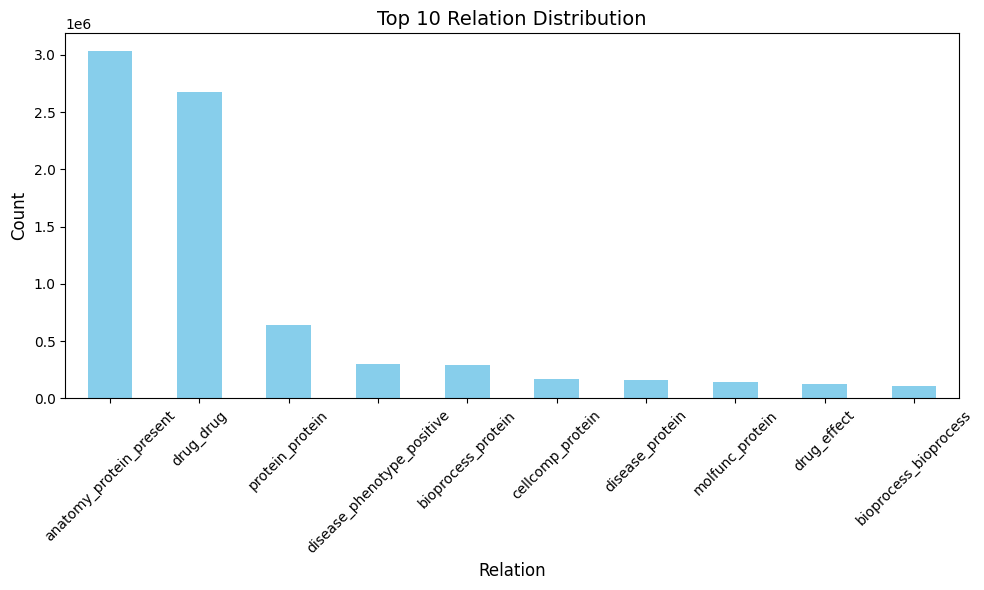

In [74]:
relation_counts = data['relation'].value_counts().head(10) 
plt.figure(figsize=(10, 6))
relation_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Relation Distribution", fontsize=14)
plt.xlabel("Relation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


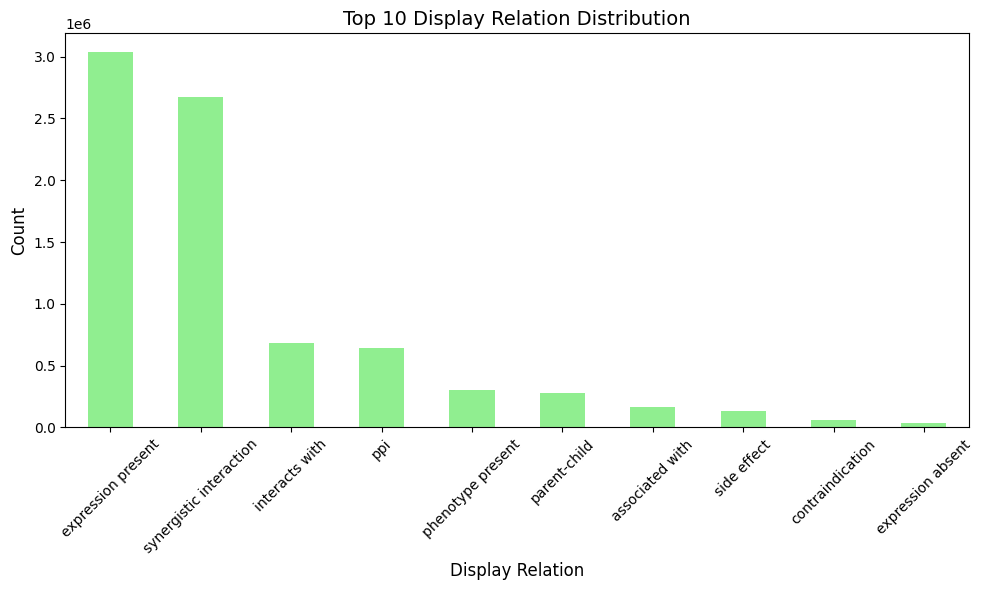

In [50]:
display_relation_counts = data['display_relation'].value_counts().head(10)  # أعلى 10 فئات فقط
plt.figure(figsize=(10, 6))
display_relation_counts.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Display Relation Distribution", fontsize=14)
plt.xlabel("Display Relation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()